In [1]:
%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
sns.set(style='whitegrid')

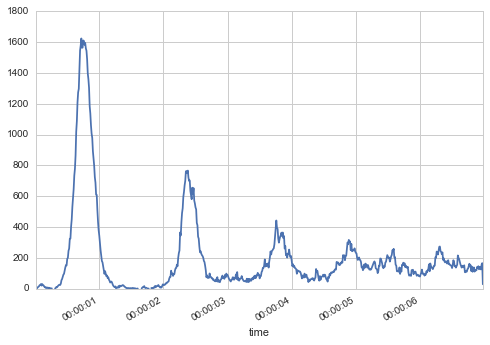

In [11]:
firing_and_regions.one.resample('10ms', how='sum').plot()

In [110]:
def inputs_and_regions_for(energy_name):
    inputData = pd.read_csv('SampleLogs/{}_Input.csv'.format(energy_name), index_col='time', \
                            names= ['time', 'source', 'destination', 'inhibitor'])
    regions = pd.read_csv('SampleLogs/{}_Region.csv'.format(energy_name), index_col='neuron', \
                          names=['neuron', 'region'])
    lowerLimit = pd.to_datetime(5, unit='s')
    inputData.index = pd.to_datetime(inputData.index, unit='ms')
    inputData = inputData[lowerLimit:]
    inputs_and_regions = inputData.join(regions, \
                                        on='source').join(regions, \
                                        on= 'destination', lsuffix='_src', rsuffix='_dst')
    inputs_and_regions['efective_input'] = 1*(1-inputs_and_regions.inhibitor) -1*inputs_and_regions.inhibitor
    answer = inputs_and_regions.groupby([inputs_and_regions.region_src  == inputs_and_regions.region_dst, 'region_src']).\
            efective_input.count().unstack().T
    answer['total'] = answer.sum(axis=1)
    answer = answer.rename(columns={True: 'within_regions', False:'between_regions'})
    return answer

In [111]:
medium = inputs_and_regions_for('MediumConst')

In [113]:
medium.head()

,between_regions,within_regions,total
region_src,,,
1,144,1496,1640
2,157,696,853
3,100,931,1031
4,24,80,104
5,148,932,1080


In [114]:
low  = inputs_and_regions_for('LowConst')

In [115]:
low.head()

,between_regions,within_regions,total
region_src,,,
1,233,2049,2282
2,166,2272,2438
3,152,9,161
4,232,1745,1977
5,151,1402,1553


In [116]:
high  = inputs_and_regions_for('HighConst')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11017b050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1147caed0>]], dtype=object)

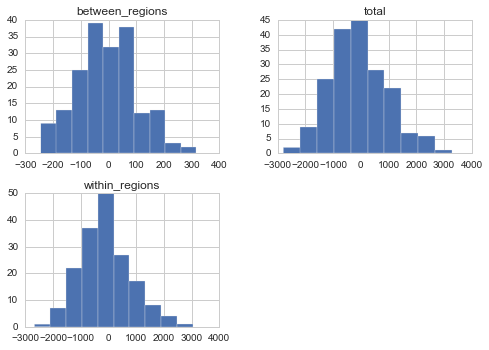

In [117]:
(medium-low).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115e14c10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11763a350>]], dtype=object)

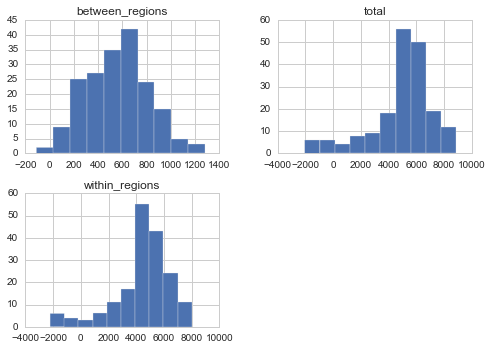

In [118]:
(high-medium).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ff631d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11adb97d0>]], dtype=object)

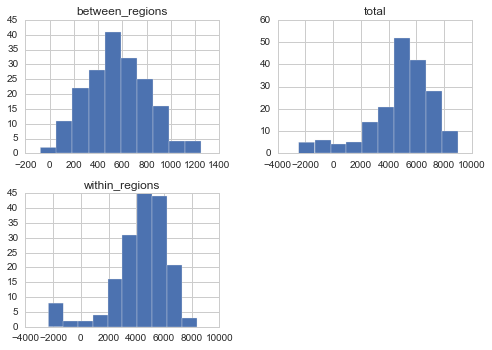

In [119]:
(high-low).hist()